Hello Azaan Khan this side.


1:  Today we are going to discuss about the python project given to me by the TechWorks company.TechWorks Consulting is a consulting company that specializes in providing top-notch IT talent to a variety of businesses.
In this project we need to find out the required criterias for the company. The company has provided me 3 csv files which are related to college tiers , cities and their respective salaries.

2:   The approach is simple first we will import all the required libraries, then we will import the data file, then we will start the preprocessing, outliers and missing value imputations, then we will run it on test train split, thenwill get the required r2 values or mse values.

The first thing we can do is we can merge the datas of all 3 csv files into a single one so that it will be easy to mange a single dataset.

lets first import the required libraries that we need.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Now we will import the merged file on which we are going to perform our task.

In [2]:
df = pd.read_csv('C:/Users/moham/Downloads/ML case Study1.csv', header = 0)

lets first see some of the rows and columns.

In [3]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager         55523   
1         NIT Bhopal            Ajmer  Executive         57081   
2       IEM, Kolkata  Rajpur Sonarpur  Executive         60347   
3  KIIT, Bhubaneswar            Ajmer  Executive         49010   
4                DTU         Durgapur  Executive         57879   

   Previous job change  Graduation Marks  EXP (Month)       CTC  \
0                    3                66           19  71406.58   
1                    1                84           18  68005.87   
2                    2                52           28  76764.02   
3                    2                81           33  82092.39   
4                    4                74           32  73878.10   

          Tier 1          Tier 2                                      Tier 3  \
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru   
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University   
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus   
3     IIT Madras     NIT Calicut                                 VIT Vellore   
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus   

  Metrio City non-metro cities  
0      Mumbai         Dehradun  
1       Delhi         Durgapur  
2     Kolkata          Asansol  
3     Chennai         Rourkela  
4   Bangalore        Kozhikode

As we can see few of the rows are categorical and few are numerical. Now we will try to sort each college according to the tiers they belong. To do this first we will convert them to a list.

In [4]:
Tier1=df["Tier 1"].tolist()
Tier2=df["Tier 2"].tolist()
Tier3=df["Tier 3"].tolist()


After this we will replace them to current dataframe.

In [5]:
df["College"] = df["College"].replace(Tier1, 1)
df["College"] = df["College"].replace(Tier2, 2)
df["College"] = df["College"].replace(Tier3, 3)


In [6]:
df.head()

College             City       Role  Previous CTC  Previous job change  \
0        2          Asansol    Manager         55523                    3   
1        2            Ajmer  Executive         57081                    1   
2        3  Rajpur Sonarpur  Executive         60347                    2   
3        3            Ajmer  Executive         49010                    2   
4        1         Durgapur  Executive         57879                    4   

   Graduation Marks  EXP (Month)       CTC         Tier 1          Tier 2  \
0                66           19  71406.58     IIT Bombay  IIIT Bangalore   
1                84           18  68005.87      IIT Delhi      IIIT Delhi   
2                52           28  76764.02  IIT Kharagpur          IGDTUW   
3                81           33  82092.39     IIT Madras     NIT Calicut   
4                74           32  73878.10     IIT Kanpur   IIITM Gwalior   

                                       Tier 3 Metrio City non-metro cities  
0  Ramaiah Institute of Technology, Bengaluru      Mumbai         Dehradun  
1                      TIET/Thapar University       Delhi         Durgapur  
2                         Manipal Main Campus     Kolkata          Asansol  
3                                 VIT Vellore     Chennai         Rourkela  
4                             SRM Main Campus   Bangalore        Kozhikode

As we can see that the college tiers are assigned to each college.
Now we will do the same with the City column.


In [7]:
Metro=df["Metrio City"].tolist()
NonMetro=df["non-metro cities"].tolist()

In [8]:
df["City"] = df["City"].replace(Metro, 1)
df["City"] = df["City"].replace(NonMetro, 2)

In [9]:
df.head()

College  City       Role  Previous CTC  Previous job change  \
0        2     2    Manager         55523                    3   
1        2     2  Executive         57081                    1   
2        3     2  Executive         60347                    2   
3        3     2  Executive         49010                    2   
4        1     2  Executive         57879                    4   

   Graduation Marks  EXP (Month)       CTC         Tier 1          Tier 2  \
0                66           19  71406.58     IIT Bombay  IIIT Bangalore   
1                84           18  68005.87      IIT Delhi      IIIT Delhi   
2                52           28  76764.02  IIT Kharagpur          IGDTUW   
3                81           33  82092.39     IIT Madras     NIT Calicut   
4                74           32  73878.10     IIT Kanpur   IIITM Gwalior   

                                       Tier 3 Metrio City non-metro cities  
0  Ramaiah Institute of Technology, Bengaluru      Mumbai         Dehradun  
1                      TIET/Thapar University       Delhi         Durgapur  
2                         Manipal Main Campus     Kolkata          Asansol  
3                                 VIT Vellore     Chennai         Rourkela  
4                             SRM Main Campus   Bangalore        Kozhikode

Now we will drop all the columns that are not required.

In [10]:
df.drop(columns= ["Tier 1","Tier 2", "Tier 3", "Metrio City" , "non-metro cities"] , inplace = True)

In [11]:
df.head()

College  City       Role  Previous CTC  Previous job change  \
0        2     2    Manager         55523                    3   
1        2     2  Executive         57081                    1   
2        3     2  Executive         60347                    2   
3        3     2  Executive         49010                    2   
4        1     2  Executive         57879                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

Now for the role column we will use get dummies function.

In [12]:
df=pd.get_dummies(df)

In [13]:
df.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP (Month)       CTC  Role_Executive  Role_Manager  
0           19  71406.58           False          True  
1           18  68005.87            True         False  
2           28  76764.02            True         False  
3           33  82092.39            True         False  
4           32  73878.10            True         False

since the values came in true false type to figure them out as 1 to manager and 0 to executive we will use.

In [14]:
df['Role_Executive'] = df['Role_Executive'].astype(int)
df['Role_Manager'] = df['Role_Manager'].astype(int)


In [15]:
df.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP (Month)       CTC  Role_Executive  Role_Manager  
0           19  71406.58               0             1  
1           18  68005.87               1             0  
2           28  76764.02               1             0  
3           33  82092.39               1             0  
4           32  73878.10               1             0

now we will drop all the columns that are not required.

In [16]:
df.drop(columns= ["Role_Executive"] , inplace = True)

In [17]:
df.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP (Month)       CTC  Role_Manager  
0           19  71406.58             1  
1           18  68005.87             0  
2           28  76764.02             0  
3           33  82092.39             0  
4           32  73878.10             0

### DATA CLEANING

Now lets get the information about our data i.e, what is the no. of columns , is there any null value or not.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   int64  
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 93.2 KB


So after we got the info we came to know that there is no null column,and there is no missing values.


Lets find the null values if any present in the data

In [19]:
pd.isnull(df).sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

As we can see we dont encounter any null values also.

Lets see the no of Rows and Columns in our dataframe

In [20]:
df.shape

(1589, 8)

In [21]:
df.describe()

College         City  Previous CTC  Previous job change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      1.975456     1.485840  55518.453744             2.528634   
std       0.838330     0.499957   6655.218445             1.123918   
min       1.000000     1.000000  36990.000000             1.000000   
25%       1.000000     1.000000  50518.000000             2.000000   
50%       2.000000     1.000000  55291.000000             3.000000   
75%       3.000000     2.000000  60109.000000             4.000000   
max       3.000000     2.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  Role_Manager  
count       1589.000000  1589.000000    1589.000000   1589.000000  
mean          59.855255    39.044682   75353.278798      0.206419  
std           14.935139    14.108875   12587.288237      0.404862  
min           35.000000    18.000000   53020.320000      0.000000  
25%           46.000000    26.000000   66902.350000      0.000000  
50%           60.000000    39.000000   73028.670000      0.000000  
75%           73.000000    51.000000   80588.670000      0.000000  
max           85.000000    64.000000  123416.990000      1.000000

So as the data is infront of us we can get alot of info from this.
count=1589,
mean of ctc=75353,
min value of ctc=53020 and on

In [22]:
df.corr()

College      City  Previous CTC  Previous job change  \
College              1.000000  0.014946      0.041979            -0.055060   
City                 0.014946  1.000000     -0.004644            -0.051670   
Previous CTC         0.041979 -0.004644      1.000000             0.005756   
Previous job change -0.055060 -0.051670      0.005756             1.000000   
Graduation Marks     0.003539  0.018616     -0.032976             0.019267   
EXP (Month)          0.011752  0.023613      0.119163             0.023488   
CTC                 -0.029592  0.020365      0.258000             0.011370   
Role_Manager        -0.014749  0.048671      0.012321            -0.017150   

                     Graduation Marks  EXP (Month)       CTC  Role_Manager  
College                      0.003539     0.011752 -0.029592     -0.014749  
City                         0.018616     0.023613  0.020365      0.048671  
Previous CTC                -0.032976     0.119163  0.258000      0.012321  
Previous job change          0.019267     0.023488  0.011370     -0.017150  
Graduation Marks             1.000000    -0.057061 -0.005450      0.017858  
EXP (Month)                 -0.057061     1.000000  0.301115     -0.026751  
CTC                         -0.005450     0.301115  1.000000      0.621311  
Role_Manager                 0.017858    -0.026751  0.621311      1.000000

3:   Since there are a number of models to perfrom on like LINEAR REGRESSION,RIDGE REGRESSION, LASSO REGRESSION, LDA,KNN, DECISION TREES ETC but as the data is continuous it will be best to go with the certain models like LR,RIDGE REGRESSION,LASSO AND DECISION TREES etc. 

### LINEAR REGRESSION

First we import Linear Regression from sklearn

In [23]:
from sklearn.linear_model import LinearRegression

lets first define the variables 

In [24]:
y = df['CTC']
x = df[['College']]

Create a linear regression object

In [25]:
lm2 = LinearRegression()

Now lets fit the model

In [26]:
lm2.fit(x,y)

LinearRegression()

To see the intercept and coefficient(beta not and beta1,beta2.....)

In [27]:
print(lm2.intercept_, lm2.coef_)

76230.99708494793 [-444.31167824]


Lets predict the value of y(salary)

In [28]:
lm2.predict(x)

array([75342.37372848, 75342.37372848, 74898.06205024, ...,
       75786.68540671, 75786.68540671, 75342.37372848])

Now we draw a scatter plot from our data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


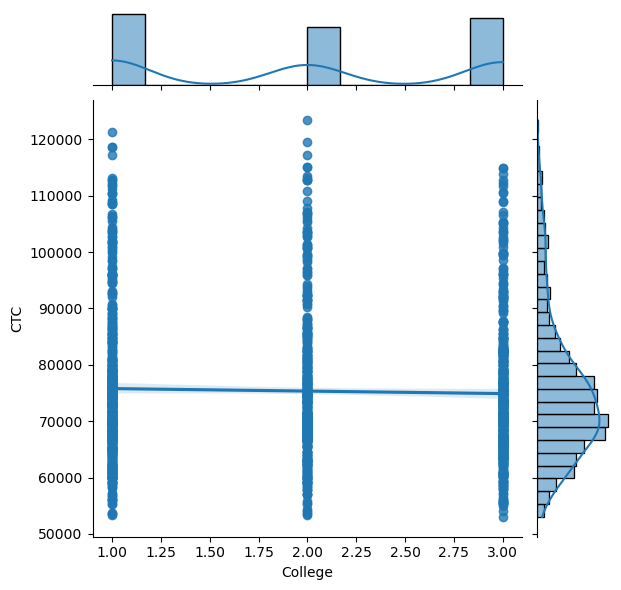

In [29]:
sns.jointplot(y = df['CTC'],x = df['College'], data = df, kind='reg')

<Axes: xlabel='College', ylabel='count'>

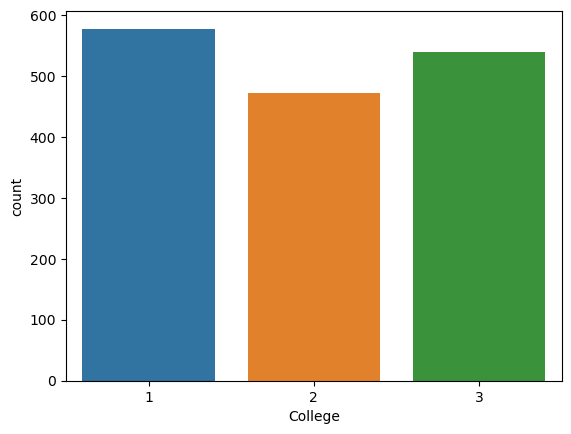

In [30]:
sns.countplot(x='College',data=df)

From the bar graph we can conclude count of colleges from tier 1 is highest.

Multiple linear regression in python

In [31]:
import statsmodels.api as sn

First we will drop the salary column

In [32]:
x_multi= df.drop("CTC", axis=1)

In [33]:
x_multi.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP (Month)  Role_Manager  
0           19             1  
1           18             0  
2           28             0  
3           33             0  
4           32             0

Create a dependent variable y_multi for ctc

In [34]:
y_multi= df["CTC"]

Add some constants first

In [35]:
x_multi_cons=sn.add_constant(x_multi)
x_multi_cons.head()

const  College  City  Previous CTC  Previous job change  Graduation Marks  \
0    1.0        2     2         55523                    3                66   
1    1.0        2     2         57081                    1                84   
2    1.0        3     2         60347                    2                52   
3    1.0        3     2         49010                    2                81   
4    1.0        1     2         57879                    4                74   

   EXP (Month)  Role_Manager  
0           19             1  
1           18             0  
2           28             0  
3           33             0  
4           32             0

Create an object lm

In [36]:
lm_multi=sn.OLS(y_multi,x_multi_cons).fit()

Lets get the summary of the data

In [37]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          4.70e-257
Time:                        21:02:12   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.918e+04   2271.950     17.246      0.000    3.47e+04    4.36e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                 -380.8308    433.455     -0.879      0.380   -1231.039     469.377
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can get a huge outcomes from the summary table

### TEST-TRAIN SPLIT

Import the test train split from sklearn

In [38]:
from sklearn.model_selection import train_test_split

Define the variables

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

Lets get the no of columns and rows given to the test and train split

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


As we can see from the result that Train got 80% of data and test got 20%.

Lets now create objects and then fit that into our model 

In [41]:
lm_a=LinearRegression()
lm_a.fit(x_train,y_train)

LinearRegression()

In [42]:
y_test_a=lm_a.predict(x_test)
y_train_a=lm_a.predict(x_train)


To predict the value of r2 first we will import r2 from sklearn

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, y_test_a)

0.5355989894790061

In [45]:
r2_score(y_train, y_train_a)

0.5331293335456955

From the values of test and train we got the values near to 0.5 and the difference between the 2 is not very high.

### RIDGE REGRESSION

NOW AS WE ARE STARTING THE 2ND MODEL WE NEED TO PRE PROCESS ALL BUT AS WE ARE DOING IT ON SAME FILE I AM NOT GOING TO DO THESE STEPS ONCE AGAIN AS THEY ARE PRE DONE FOR ME.
No need to import any library too.

First standardize the data

In [46]:
from sklearn import preprocessing

<Axes: xlabel='College'>

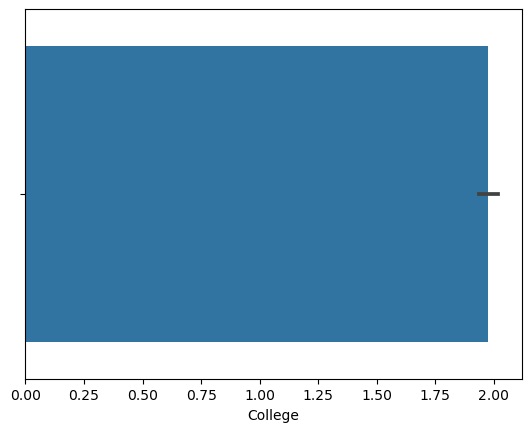

In [47]:
sns.barplot(data=df,x='College')

Create a scaler object which will store a scaling info in our x variable

In [48]:
scaler= preprocessing.StandardScaler().fit(x_train)

Transform the data into x_train_s and x_test_s

In [49]:
x_train_s=scaler.transform(x_train)
x_test_s= scaler.transform(x_test)

Now we will first import the Ridge from sklearn

In [50]:
from sklearn.linear_model import Ridge

Now we will create the object lm_r

In [51]:
lm_r=Ridge(alpha=0.5)
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

As r2 is already imported we will simply find the value for test and train.

In [52]:
r2_score(y_test,lm_r.predict(x_test_s))

0.5355848845406526

In [53]:
r2_score(y_train,lm_r.predict(x_train_s))

0.5331292560773075

As the result in front is very less than the LINEAR REGRESSION model so as per now we are considering LINEAR PROGRESSION model as effective.

### LASSO REGRESSION

All processes are done already ....
FIRST we will import LASSO from sklearn 

In [54]:
from sklearn.linear_model import Lasso

Lets first make a bar chart between college and ctc.

<Axes: xlabel='College', ylabel='CTC'>

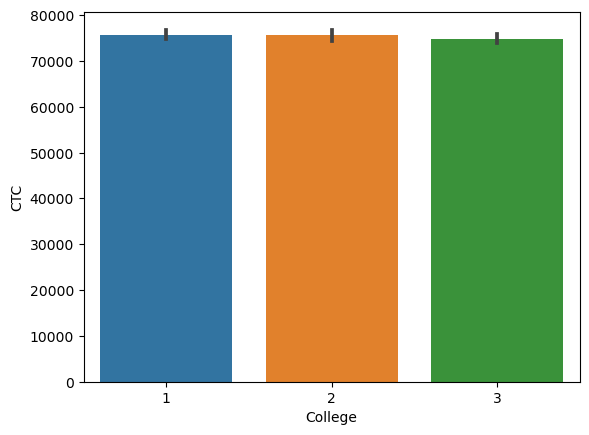

In [55]:
sns.barplot(data= df, x='College', y='CTC')

Recall we gave alpha 0.5 value in RIDGE REGRESSION But here we will give it 0.4 to increase the accuracy of our data.

In [56]:
lm_l=Lasso(alpha=0.4)

In [57]:
lm_l.fit(x_train_s,y_train)

Lasso(alpha=0.4)

In [58]:
r2_score(y_test,lm_l.predict(x_test_s))

0.5356042489636199

In [59]:
r2_score(y_train,lm_l.predict(x_train_s))

0.533129326832899

As a result we came to know that the values are quite better in comparison to the models performed above.So upto now LASSO REGRESSION GAVE US THE BETTER RESULT.

### DECISION TREE

Dependent-independent data-split 

Here ist x will include all columns but without CTC column

In [60]:
X=df.loc[:,df.columns !='CTC']
type(X)


pandas.core.frame.DataFrame

In [61]:
y=df["CTC"]

In [62]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

Here we got CTC of first 5 rows

Now we will perform test train split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
X_train.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
1062        1     2         61410                    4                83   
215         1     1         59781                    1                46   
654         1     2         62521                    1                70   
55          1     2         66624                    1                63   
1187        3     2         54621                    2                52   

      EXP (Month)  Role_Manager  
1062           59             1  
215            41             0  
654            59             0  
55             58             1  
1187           62             0

In [65]:
X_test.shape

(318, 7)

In test data we got 318 data out of total data

In [66]:
y_train.shape

(1271,)

We got 1271 train data as seen in early models

Now first we will import tree from sklearn

In [67]:
from sklearn import tree

In [68]:
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [69]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

Predict values using train and test model

In [70]:
y_train_pred=regtree.predict(X_train)
y_test_pred=regtree.predict(X_test)

To predict the values whether r2 or mse we need to import them first from sklearn.

In [71]:
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
mean_squared_error(y_test,y_test_pred)

60424631.026134744

AS seen we are getting a huge value for mse it might be due to overfitting

In [73]:
r2_score(y_train,y_train_pred)

0.6137194061789908

In [74]:
r2_score(y_test,y_test_pred)

0.5927831611924912

As seen in the data the values are up as compared to other models that means out of the following this one is perfect and efficient model.

plotting a decision tree


Import the required libraries first like PYDOTPLUS AND GRAPHVIZ

In [75]:
import pydotplus
import matplotlib.pyplot as plt
import graphviz

First we will create a dotfile 

In [76]:
dot_data=tree.export_graphviz(regtree,out_file=None)

now we will import image from IPython

In [77]:
from IPython.display import Image

In [78]:
graph=pydotplus.graph_from_dot_data(dot_data)

In [79]:
image(graph.create_png())

NameError: name 'image' is not defined

4:   We got the decision trees model performance as best because decision tree 1. Interpretability: Decision trees provide a clear and easy-to-understand decision-making process.
2. Non-linearity: Decision trees can capture non-linear relationships between features and the target variable without the need for feature engineering.
3. Handling of missing values: Decision trees can handle missing values in the data without requiring imputation.
4. Robustness to outliers: Decision trees are robust to outliers in the data.

5:    There can be a number of steps to improve the model. Some of the steps are a) PRUNING       b)ENSEMBLING METHODS           c)HYPERPARAMETERS           d)CROSS VALIDATION
e) REGULARIZATION